# KMeans

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

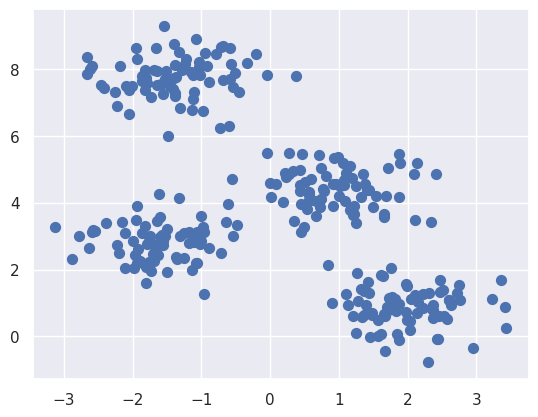

In [28]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [29]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, copy_x=True)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

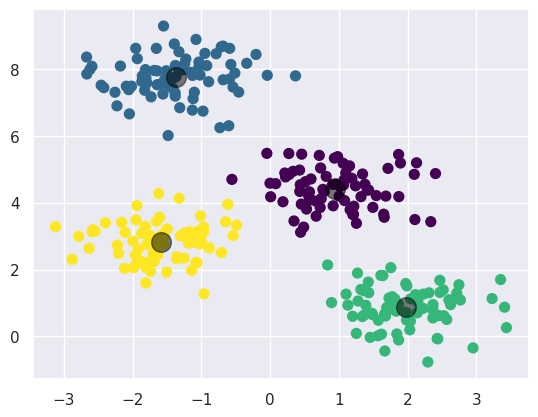

In [30]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [31]:
# Initialize yourself

In [32]:
class myKMeans:
    def __init__(self, k, method='random', max_iter=300):
        self.k = k 
        self.method = method
        self.max_iter = max_iter

    def init_centers(self, X):
        if self.method == 'random':
            return X[np.random.choice(np.arange(X.shape[0]), self.k)] # fix me
        if self.method == 'k-means++':
            # your code here
            pass
    
    def fit(self, X):
        self.centroids = self.init_centers(X)
        for _ in range(self.max_iter):
            clusters = self.expectation(X, self.centroids)
            new_centroids = self.maximization(X, clusters)
            if (new_centroids == self.centroids).all(): # fix me
                break

            self.centroids = new_centroids
            
    def expectation(self, X, centroids):
        clusters = np.zeros(X.shape[0])
        for i, x in enumerate(X):
            distances = np.zeros(centroids.shape[0])
            for j in range(centroids.shape[0]):
                distances[j] = np.linalg.norm(x - centroids[j])

            clusters[i] = np.argmin(distances)

        return clusters

    def maximization(self, X, clusters):
        new_centroids = np.zeros_like(self.centroids)

        for c in range(self.k):
            new_centroids[c] = X[clusters==c].mean(axis=0)

        # n, m = X.shape
        # new_centroids = np.zeros_like(self.centroids.shape)
        # cluster_point_quantity = np.zeros(self.centroids.shape[0])
        # for i in range(n):
        #     for j in range(self.centroids.shape[0]):
        #         if clusters[i] == j:
        #             new_centroids[j] += X[i]
        #             cluster_point_quantity[j] += 1
        #
        # for i in range(self.centroids.shape[0]):
        #     new_centroids[i] /= cluster_point_quantity[i]

        return new_centroids    
        
    def predict(self, X):
        # return predictions using expectation function
        return  self.expectation(X, self.centroids)
    
    def predict_proba(self, X):
        # ideas ?
        return 

In [37]:
kmeans = myKMeans(k=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

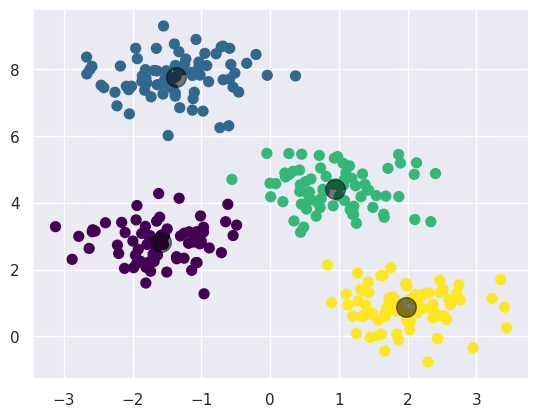

In [38]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.centroids
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

# Agglomerative Clustering

In [39]:
from sklearn.cluster import AgglomerativeClustering

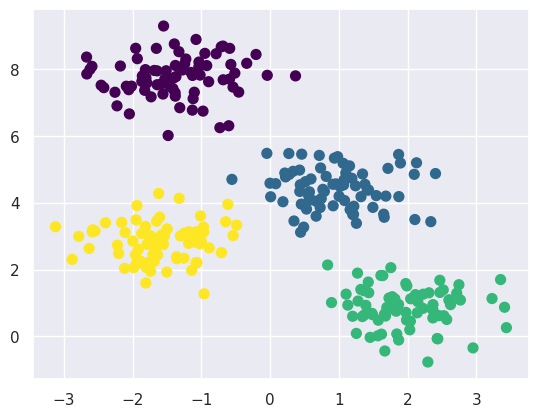

In [36]:
ac = AgglomerativeClustering(n_clusters=None, distance_threshold=10)
y_ac = ac.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_ac, s=50, cmap='viridis')